In [1]:
import numpy as np
from tensorflow.keras.models import load_model
from ztfrapid import ztf_rapid
import matplotlib.pyplot as plt

You will need to install 'emcee' if you wish to train your own classifier on new data.


In [2]:
files = np.load('/home/nmiranda/workspace/ztf_rapid/data/processed/test_none/test_none.npz', allow_pickle=True)
print(list(files.keys()))
X_test = files['X_test']
y_test = files['y_test']
orig_lc_test = files['orig_lc_test']
timesX_test = files['timesX_test']
class_names = files['class_names']
objids_test = files['objids_test']

['X_train', 'X_test', 'y_train', 'y_test', 'objids_test', 'objids_train', 'orig_lc_test', 'orig_lc_train', 'timesX_test', 'class_names', 'labels_train']


In [3]:
model_filepath = '/home/nmiranda/workspace/ztf_rapid/models/test_none/test_none.hdf5'
model = load_model(model_filepath)

In [4]:
y_pred = ztf_rapid.predict(model, X_test)
y_test_index = np.argmax(y_test[:,0,:], axis=-1)

In [5]:
idx = 0
lightcurve = orig_lc_test[idx]
this_timesX = timesX_test[idx]
this_X_test = X_test[idx]
this_objid = objids_test[idx]
this_label = ztf_rapid.CLASS_MAP[y_test_index[idx]]
this_y_pred = y_pred[idx]

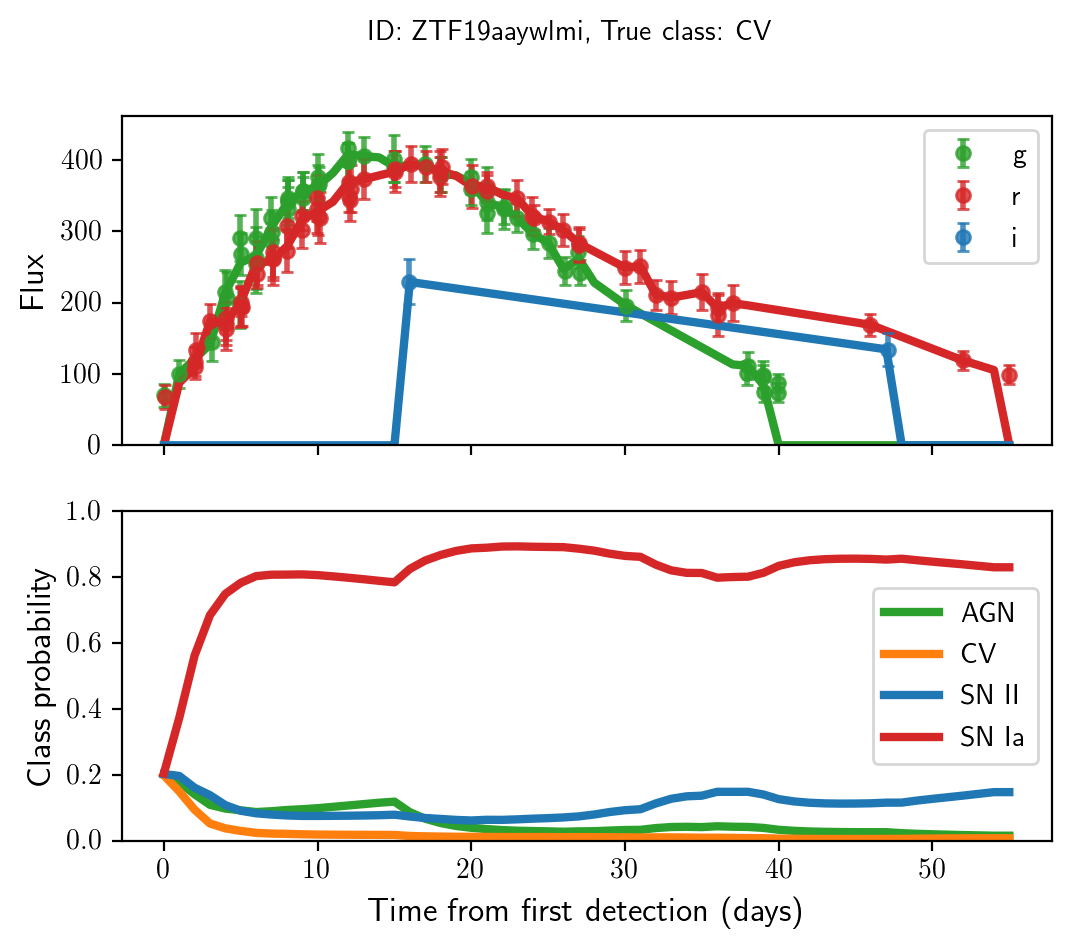

In [6]:
ztf_rapid.plot_lightcurve_scores(
    lightcurve=lightcurve, 
    timesX=this_timesX, 
    X=this_X_test, 
    y=this_y_pred, 
    objid=this_objid, 
    true_label=this_label, 
    class_names=class_names
    )